<a href="https://colab.research.google.com/github/brunonma/analisededados/blob/main/AN%C3%81LISE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
#upload do arquivo
from google.colab import files
arq=files.upload()


Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [ ]:
#criando nosso DataFrame
df=pd.read_excel("AdventureWorks.xlsx")

In [ ]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [ ]:
#Quantidade de linhas e colunas
df.shape

(904, 16)

In [ ]:
#verficando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [ ]:
#Qual a receita total?
df["Valor Venda"].sum()

5984606.1426

In [ ]:
#visualizando as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [ ]:
#Qual o custo total?
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"])#criando a coluna de custo

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [ ]:
#Qual o cuso total?
round(df["custo"].sum(), 2)

2486783.05

In [ ]:
#Agora que temos a receita e custo e o total, podemos achar o lucro total
#Vamos criar uma coluna de lucro que Receita - custo
df["lucro"] = df["Valor Venda"] - df["custo"]

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [ ]:
#Total Lucro
round(df["lucro"].sum(), 2) 

3497823.09

In [ ]:
#Criando uma coluna com total de dias para enviar o produto
df["Tempo_envio"]=df["Data Envio"]-df["Data Venda"]

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [ ]:
#extraindo apenas os dias
df["Tempo_envio"] = (df["Data Envio"]-df["Data Venda"]).dt.days

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [ ]:
#verficiando o tipo de coluna Tempo_envio
df["Tempo_envio"].dtype

dtype('int64')

In [ ]:
#média tempo de envio por Marca
df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

In [ ]:
#verficando se temos dados faltantes 
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo_envio       0
dtype: int64

In [ ]:
#Agrupar por ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

In [ ]:
pd.options.display.float_format = "(:20, .2f)".format

In [ ]:
#Resetando o index 
lucro_ano = df.groupby([df["Data Venda"].dt.year,"Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"(:20, .2f)"
1,2008,Contoso,"(:20, .2f)"
2,2008,Fabrikam,"(:20, .2f)"
3,2009,Adventure Works,"(:20, .2f)"
4,2009,Contoso,"(:20, .2f)"
5,2009,Fabrikam,"(:20, .2f)"


In [ ]:
#Qual total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

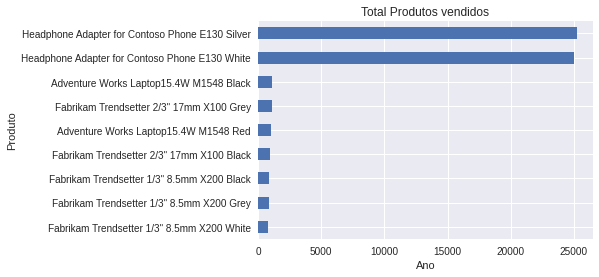

In [ ]:
#Gráfico Total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos vendidos")
plt.xlabel("Ano")
plt.ylabel("Produto");

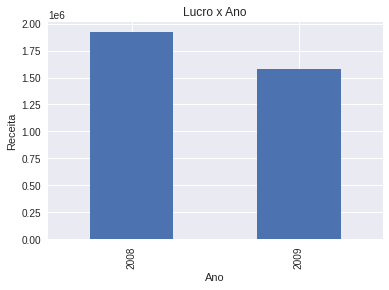

In [ ]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [ ]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum()

Data Venda
2008   (:20, .2f)
2009   (:20, .2f)
Name: lucro, dtype: float64

In [ ]:
#selecionando apenas as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [ ]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,"(:20, .2f)","(:20, .2f)",6,"(:20, .2f)","(:20, .2f)",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"(:20, .2f)","(:20, .2f)",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,"(:20, .2f)","(:20, .2f)",6,"(:20, .2f)","(:20, .2f)",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"(:20, .2f)","(:20, .2f)",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,"(:20, .2f)","(:20, .2f)",6,"(:20, .2f)","(:20, .2f)",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"(:20, .2f)","(:20, .2f)",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,"(:20, .2f)","(:20, .2f)",6,"(:20, .2f)","(:20, .2f)",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"(:20, .2f)","(:20, .2f)",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,"(:20, .2f)","(:20, .2f)",6,"(:20, .2f)","(:20, .2f)",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"(:20, .2f)","(:20, .2f)",4


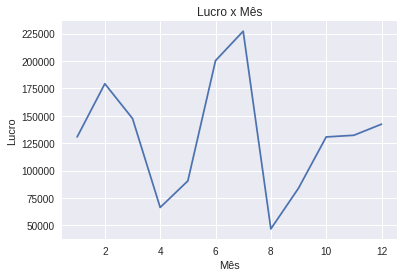

In [ ]:
df_2009.groupby(df["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

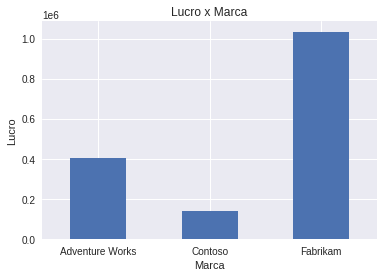

In [ ]:
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

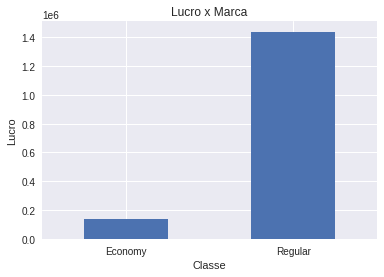

In [ ]:
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

In [ ]:
df["Tempo_envio"].describe()

count   (:20, .2f)
mean    (:20, .2f)
std     (:20, .2f)
min     (:20, .2f)
25%     (:20, .2f)
50%     (:20, .2f)
75%     (:20, .2f)
max     (:20, .2f)
Name: Tempo_envio, dtype: float64

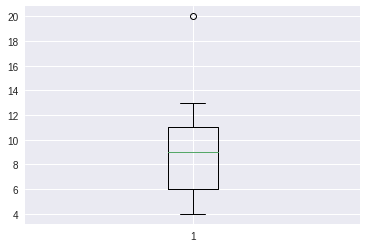

In [ ]:
#gráfico de Boxplot
plt.boxplot(df["Tempo_envio"]);

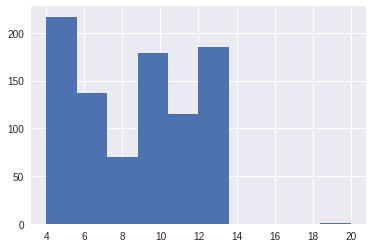

In [ ]:
#Histograma
plt.hist(df["Tempo_envio"]);

In [ ]:
#Tempo mínimo de envio
df["Tempo_envio"].min()

4

In [ ]:
df["Tempo_envio"].max()

20

In [ ]:
#identificando o Outlier
df[df["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,"(:20, .2f)","(:20, .2f)",6,"(:20, .2f)","(:20, .2f)",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"(:20, .2f)","(:20, .2f)",20


In [ ]:
df.to_csv("df_vendas_novo.csv", index=False)